# What drives the price of a car?

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### Business Understanding

The market for used cars has progressed significantly as more people choose personal vehicles. The second-hand automobile market has significantly grown after the covid had struck due to reduction in the cash flow and economic crisis and semiconductor chip shortages that to a mass reduction in the vehicle production which made people look for afforable second-hand vehicles instead of the brand-new ones.

To enable consumers to know the actual worth of their car or desired
car, by simply providing the program with a set of attributes from the desired car to predict the car price.
The purpose of this study is to understand and evaluate used car prices, and to develop a strategy
that utilizes Machine Learning techniques to predict used car prices.

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
from copy import deepcopy

## Data Understanding

1. Looked at the data info using df.info() to see the index dtype and columns and non-null values.
2. Checked on how many unique values in each feature.
3. Checked on the missing values count.

In [3]:
df=pd.read_csv('vehicles.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
id              426880 non-null int64
region          426880 non-null object
price           426880 non-null int64
year            425675 non-null float64
manufacturer    409234 non-null object
model           421603 non-null object
condition       252776 non-null object
cylinders       249202 non-null object
fuel            423867 non-null object
odometer        422480 non-null float64
title_status    418638 non-null object
transmission    424324 non-null object
VIN             265838 non-null object
drive           296313 non-null object
size            120519 non-null object
type            334022 non-null object
paint_color     296677 non-null object
state           426880 non-null object
dtypes: float64(2), int64(2), object(14)
memory usage: 58.6+ MB


In [4]:
df_master=deepcopy(df)

In [5]:
# Rearranging Columns

df=df[['id', 'region', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state','price']]

In [6]:
df.iloc[30:40,:]

,id,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state,price
30,7316743432,auburn,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,5TFRM5F17HX120972,NaN,NaN,pickup,red,al,30990
31,7316356412,auburn,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,NaN,rwd,full-size,truck,black,al,15000
32,7316343444,auburn,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,other,1GT220CG8CZ231238,4wd,NaN,pickup,black,al,27990
33,7316304717,auburn,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,clean,other,1GCVKREH6GZ228691,4wd,NaN,pickup,silver,al,34590
34,7316285779,auburn,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,clean,automatic,NaN,4wd,NaN,truck,grey,al,35000
35,7316257769,auburn,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,1GCHTCE37G1186784,4wd,NaN,pickup,red,al,29990
36,7316133914,auburn,2011.0,chevrolet,corvette grand sport,good,8 cylinders,gas,30237.0,clean,other,1G1YR3DW3B5102190,rwd,NaN,other,red,al,38590
37,7316130053,auburn,1992.0,jeep,cherokee,excellent,6 cylinders,gas,192000.0,clean,automatic,NaN,4wd,NaN,NaN,NaN,al,4500
38,7315816316,auburn,2017.0,jeep,wrangler unlimited sport,good,6 cylinders,gas,30041.0,clean,other,1C4BJWDG5HL705371,4wd,NaN,other,silver,al,32990
39,7315770394,auburn,2017.0,chevrolet,silverado 1500 regular,good,6 cylinders,gas,40784.0,clean,other,1GCNCNEH7HZ118773,NaN,NaN,pickup,white,al,24590


In [7]:
for col in df.columns:
    print(col, df[col].nunique())

id 426880
region 404
year 114
manufacturer 42
model 29649
condition 6
cylinders 8
fuel 5
odometer 104870
title_status 6
transmission 3
VIN 118246
drive 3
size 4
type 13
paint_color 12
state 51
price 15655


## Data Preparation

1. Almost every column has missing values. So first we have to do the imputations.
2. Drop the columns `VIN` and `State` as they are not relevant for price prediction.
3. Identify `Numerical` and `Categorical` Columns and label encode the categorical features. There are two numerical features, Year and Odometer, rest are categorical.
4. `Label Encode` the Categorical Features, namely: region, manufacturer, model, condition, cylinders, fuel, title_status, transmission, drive, size, type & paint_color.
5. After encoding, we first impute the Categorical Data using simple imputations of `Mean` and `Median` and testing them on `Bayesian Ridge estimator` one by one. We save the scores of 6 fold `cross validation` in another dataframe.
6. Now we impute the data using IterativeImputer on 4 estimators - 

    1. `BayesianRidge`
    
    2. `DecisionTreeRegressor`
    
    3. `ExtraTreesRegressor`
    
    4. `KNeighborsRegressor`
    
7. The score of these estimators is also saved in the dataframe to compare with the previous imputers.
8. Created a plot to compare the scores more intuitively.
9. Checking the scores, we move ahead with `IterativeImputer` using `Bayesian Ridge estimator` to impute the missing values of categorical features.
10. In the next step, we impute the missing values in `Numerical Features` using `ExtraTreesRegressor` as estimator in IterativeImputation.
11. Convert the Target Variable to its log values, so that we get a `normalized target`.
12. We find out the outliers for numerical variables and target and drop the outlier data points.

    `Shape before pre-processing: 426,880`
    
    `Shape after pre-processing: 364,432`
    
    `Total 62,448 data points dropped.`
    
    
13. Saved this processed data in a new csv file.

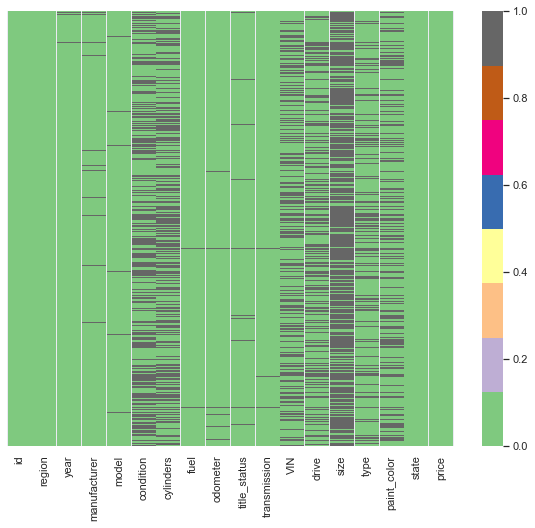

In [8]:
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='Accent')

In [9]:
df=df.drop(columns=['VIN','state'])

In [10]:
df.head()

,id,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,price
0,7222695916,prescott,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6000
1,7218891961,fayetteville,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11900
2,7221797935,florida keys,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21000
3,7222270760,worcester / central MA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500
4,7210384030,greensboro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4900


In [11]:
num_col=['year','odometer']
cat_cols=['region','manufacturer','model','condition','cylinders','fuel','title_status','transmission','drive','size','type','paint_color']

In [12]:
# Label Encoding of Categorical Variables

from sklearn.preprocessing import LabelEncoder

original=deepcopy(df_master)
mask=df[cat_cols].isnull()

df[cat_cols]=df[cat_cols].astype(str).apply(LabelEncoder().fit_transform)
df[cat_cols]=df[cat_cols].where(~mask, original)

In [13]:
df_master.condition.value_counts()

good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: condition, dtype: int64

In [14]:
df.condition.value_counts()

2    121456
0    101467
3     21178
1      6769
5      1305
6       601
Name: condition, dtype: int64

In [15]:
df.iloc[30:40]

,id,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,price
30,7316743432,16,2017.0,40,27851,2,6,2,41124.0,0,3,NaN,NaN,9,9,30990
31,7316356412,16,2013.0,13,14513,0,5,2,128000.0,0,0,3,1,11,0,15000
32,7316343444,16,2012.0,14,24472,2,6,2,68696.0,0,3,0,NaN,9,0,27990
33,7316304717,16,2016.0,7,24803,2,5,2,29499.0,0,3,0,NaN,9,10,34590
34,7316285779,16,2019.0,40,26341,0,5,2,43000.0,0,0,0,NaN,11,5,35000
35,7316257769,16,2016.0,7,11008,2,5,2,17302.0,0,3,0,NaN,9,9,29990
36,7316133914,16,2011.0,7,11444,2,6,2,30237.0,0,3,3,NaN,8,9,38590
37,7316130053,16,1992.0,20,10366,0,5,2,192000.0,0,0,0,NaN,NaN,NaN,4500
38,7315816316,16,2017.0,20,28690,2,5,2,30041.0,0,3,0,NaN,8,10,32990
39,7315770394,16,2017.0,7,24890,2,5,2,40784.0,0,3,NaN,NaN,9,11,24590


In [16]:
from sklearn.linear_model import BayesianRidge
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
import numpy as np

In [17]:
check_imputer=deepcopy(df)

In [18]:
# Estimate the score on the entire dataset by filling missing values by mean and median

br_estimator = BayesianRidge() #base estimator
N_SPLITS = 6  #defining the cross-validation splitting strategy

score_simple_imputer = pd.DataFrame() #dataframe to store error of imputer

#computing MSE for mean and median
for strategy in ('mean', 'median'):
    X=check_imputer.iloc[:,:-1]
    y=check_imputer.iloc[:,-1]
    estimator = make_pipeline(SimpleImputer(missing_values=np.nan, strategy=strategy), br_estimator)
    score_simple_imputer[strategy] = cross_val_score(estimator, X, y, scoring='neg_mean_squared_error', cv=N_SPLITS)

In [19]:
score_simple_imputer

,mean,median
0,-1.758766e+14,-1.758765e+14
1,-1.425351e+14,-1.425351e+14
2,-4.980197e+13,-4.980197e+13
3,-1.290644e+14,-1.290644e+14
4,-1.967277e+14,-1.967277e+14
5,-1.965037e+14,-1.965037e+14


In [20]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [21]:
# Estimate the score on the entire dataset by filling missing values by 4 different iterative imputer

# Estimators for IterativeImputer
estimators = [BayesianRidge(),
              DecisionTreeRegressor(max_features='sqrt', random_state=0),
              ExtraTreesRegressor(n_estimators=10, random_state=0),
              KNeighborsRegressor(n_neighbors=15)]

score_iterative_imputer = pd.DataFrame()

In [22]:
# data_x = {
#     'ProductID': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
#     'ProductName': ['Widget A', np.nan, 'Widget C', 'Widget A', 'Widget B',
#                     'Widget C', 'Widget A', np.nan, 'Widget C', 'Widget A'],
#     'Category': ['Electronics', np.nan, np.nan, 'Electronics', 'Electronics',
#                  'Clothing', np.nan, 'Electronics', 'Clothing', 'Electronics'],
#     'SalesPrice': [19.99, 29.99, 14.99, np.nan, 29.99, 14.99, np.nan, 29.99, 14.99, 19.99],
#     'QuantitySold': [np.nan, 30, 70, np.nan, np.nan, 80, 55, 40, 65, 75]
# }

# dfx = pd.DataFrame(data_x)
# dfx

In [23]:
for esti in estimators:
    print("Estimating",esti.__class__.__name__)
    imputer = IterativeImputer(esti)
    df_new=check_imputer.copy()

    for col in check_imputer.columns:
        df_new[col]=imputer.fit_transform(df_new[[col]])
    X=df_new.iloc[:,:-1]
    y=check_imputer.iloc[:,-1:]

    score_iterative_imputer[esti.__class__.__name__]=cross_val_score(esti,X,y,scoring='neg_mean_squared_error',cv=6)

Estimating BayesianRidge
Estimating DecisionTreeRegressor
Estimating ExtraTreesRegressor
Estimating KNeighborsRegressor


In [24]:
score_iterative_imputer

,BayesianRidge,DecisionTreeRegressor,ExtraTreesRegressor,KNeighborsRegressor
0,-1.758766e+14,-1.760424e+14,-2.080080e+14,-1.797418e+14
1,-1.425351e+14,-5.350984e+14,-1.720020e+14,-1.328450e+14
2,-4.980196e+13,-1.032393e+14,-8.827691e+13,-6.869161e+13
3,-1.290644e+14,-1.464032e+14,-1.934478e+14,-1.309985e+14
4,-1.967277e+14,-1.968658e+14,-2.407799e+14,-2.024961e+14
5,-1.965037e+14,-5.139734e+14,-2.282923e+14,-2.156728e+14


In [25]:
import matplotlib.pyplot as plt

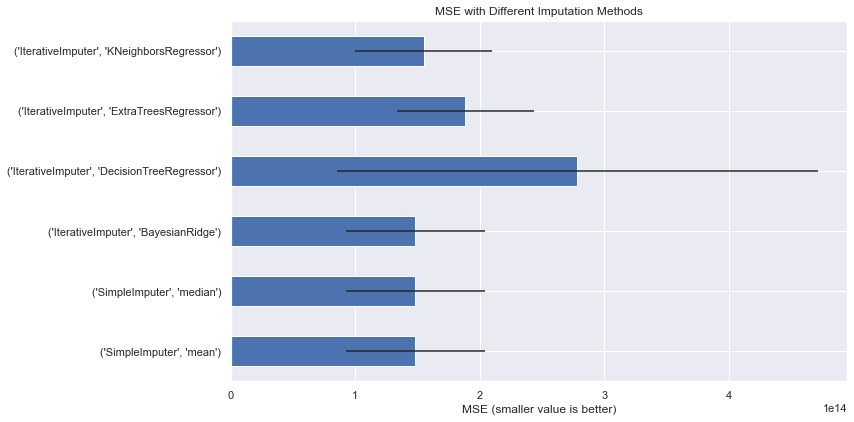

In [26]:
#ploting the graphs of scores each method
scores = pd.concat(
    [score_simple_imputer, score_iterative_imputer],
    keys=['SimpleImputer', 'IterativeImputer'], axis=1
)
fig, ax = plt.subplots(figsize=(12, 6))
means = -scores.mean()
errors = scores.std()
means.plot.barh(xerr=errors, ax=ax)
ax.set_title('MSE with Different Imputation Methods')
ax.set_xlabel('MSE (smaller value is better)')
ax.set_yticks(np.arange(means.shape[0]))
ax.set_yticklabels(means.index.tolist())
plt.tight_layout(pad=1)
plt.savefig('different-imputations-method',dpi=None)
plt.show()

### Filling Numerical Values

In [27]:
df.isnull().sum()[num_col]

year        1205
odometer    4400
dtype: int64

In [28]:
df_num=df[num_col]
imputer_num=IterativeImputer(estimators[2]) #estimators[2] = ExtraTreesRegressor
impute_data=imputer_num.fit_transform(df_num)
df[num_col]=impute_data

In [29]:
df.isnull().sum()[num_col]

year        0
odometer    0
dtype: int64

In [30]:
df.isnull().sum()[cat_cols]

region               0
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
title_status      8242
transmission      2556
drive           130567
size            306361
type             92858
paint_color     130203
dtype: int64

In [31]:
# df_xx=deepcopy(df)

In [32]:
for col in cat_cols:
    imputer = IterativeImputer(BayesianRidge())
    df[col]=imputer.fit_transform(df[[col]])

In [33]:
# data_cat=data[cat_cols]
# encoder=preprocessing.LabelEncoder()

# #create a for loop to iterate through each column in the data
# for columns in cat_cols:
#     encode(data_cat[columns])
#     impute_data=imputer.fit_transform(data_cat[columns].values.reshape(-1, 1))
#     impute_data=impute_data.astype('int64')
#     impute_data = pd.DataFrame(impute_data)
#     impute_data =encoder.inverse_transform(impute_data.values.reshape(-1, 1))
#     data_cat[columns]=impute_data
# data[cat_cols]=data_cat

In [34]:
df.head()

,id,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,price
0,7222695916,277.0,2018.0,19.052601,16739.145891,1.27918,4.634369,2.083828,39068.572507,0.150834,0.502361,0.952348,1.204731,6.699586,6.192394,6000
1,7218891961,105.0,2018.0,19.052601,16739.145891,1.27918,4.634369,2.083828,39068.572507,0.150834,0.502361,0.952348,1.204731,6.699586,6.192394,11900
2,7221797935,111.0,2018.0,19.052601,16739.145891,1.27918,4.634369,2.083828,39068.572507,0.150834,0.502361,0.952348,1.204731,6.699586,6.192394,21000
3,7222270760,396.0,2018.0,19.052601,16739.145891,1.27918,4.634369,2.083828,39068.572507,0.150834,0.502361,0.952348,1.204731,6.699586,6.192394,1500
4,7210384030,131.0,2018.0,19.052601,16739.145891,1.27918,4.634369,2.083828,39068.572507,0.150834,0.502361,0.952348,1.204731,6.699586,6.192394,4900


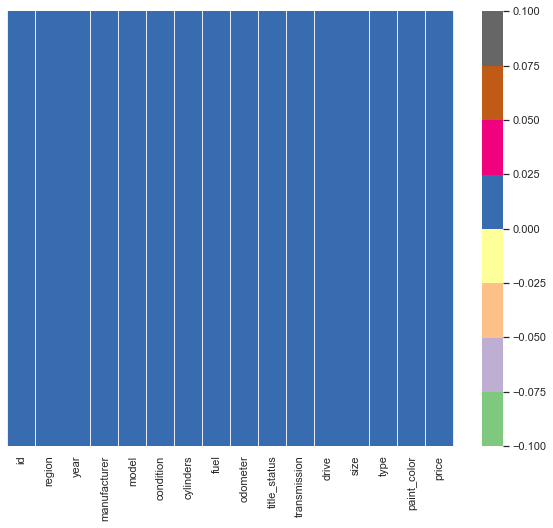

In [35]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='Accent')

In [36]:
ckpt=deepcopy(df)

In [37]:
#it will return the range of the variables and the values outside this range will be outliers
def outliers(arr,col):
    q1,q3=(arr[col].quantile([0.25,0.75]))
    IQR=q3-q1
    x1=q1-1.5*IQR
    x2=q3+1.5*IQR
    return (x1,x2)

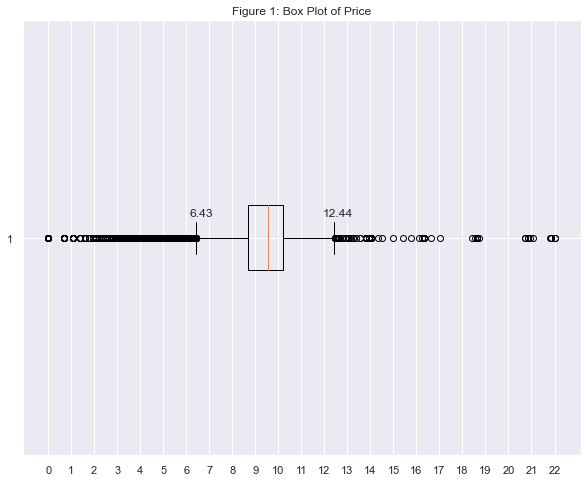

In [38]:
def min_max_price(df):
    r=[]
    q1,q3=(df['logprice'].quantile([0.25,0.75]))
    r.append(q1-1.5*(q3-q1))
    r.append(q3+1.5*(q3-q1))
    return (r)
df['logprice'] = np.log(df['price'])
x=df['logprice']
price_range=list(range(0,int(max(df['logprice']))+1))
red_square = dict(markerfacecolor='g', marker='s')
plt.boxplot(x, vert=False)
plt.xticks(price_range)
plt.text(min_max_price(df)[0]-0.3,1.05,str(round(min_max_price(df)[0],2)))
plt.text(min_max_price(df)[1]-0.5,1.05,str(round(min_max_price(df)[1],2)))
plt.title("Figure 1: Box Plot of Price")
# plt.savefig('graph-boxplot-price.jpg')
plt.show()

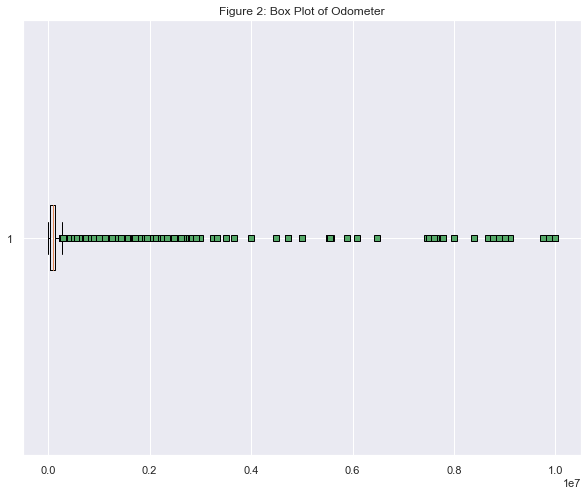

In [39]:
fig, ax1 = plt.subplots()
ax1.set_title('Figure 2: Box Plot of Odometer')
ax1.boxplot(df['odometer'], vert=False, flierprops=red_square)
plt.savefig('graph-boxplot-odometer.jpg')
plt.show()

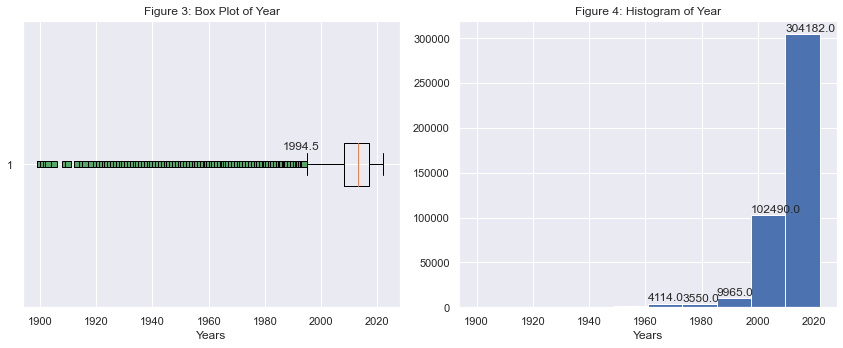

In [40]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

#ploting boxplot
o1,o2=outliers(df,'year')
ax1.boxplot(sorted(df['year']), vert=False, flierprops=red_square)
ax1.set_xlabel("Years")
ax1.set_title("Figure 3: Box Plot of Year")
ax1.text(o1-8,1.05,str(round(o1,2)))

#ploting histogram
hist,bins=np.histogram(df['year'])
n, bins, patches = ax2.hist(x=df['year'], bins=bins)
ax2.set_xlabel("Years")
ax2.set_title("Figure 4: Histogram of Year")
for i in range(len(n)):
    if(n[i]>2000):
        ax2.text(bins[i],n[i]+3000,str(n[i]))

plt.tight_layout()
plt.savefig('graph-barplot-histogram-year.jpg',dpi=1200)
plt.show()

In [41]:
#removing outliers 
df_new=df.copy()
out=np.array(['logprice','odometer','year'])
for col in out:
    o1,o2=outliers(df_new,col)
    df_new=df_new[(df_new[col]>=o1) & (df_new[col]<=o2)]
    print('IQR of',col,'=',o1,o2)
df_new=df_new[df_new['price']!=0]
df_new.drop('logprice',axis=1,inplace=True)

IQR of logprice = 6.430225879298414 12.436843880886139
IQR of odometer = -107840.0 282304.0
IQR of year = 1994.5 2030.5


In [42]:
df_new.head()

,id,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,price
0,7222695916,277.0,2018.0,19.052601,16739.145891,1.27918,4.634369,2.083828,39068.572507,0.150834,0.502361,0.952348,1.204731,6.699586,6.192394,6000
1,7218891961,105.0,2018.0,19.052601,16739.145891,1.27918,4.634369,2.083828,39068.572507,0.150834,0.502361,0.952348,1.204731,6.699586,6.192394,11900
2,7221797935,111.0,2018.0,19.052601,16739.145891,1.27918,4.634369,2.083828,39068.572507,0.150834,0.502361,0.952348,1.204731,6.699586,6.192394,21000
3,7222270760,396.0,2018.0,19.052601,16739.145891,1.27918,4.634369,2.083828,39068.572507,0.150834,0.502361,0.952348,1.204731,6.699586,6.192394,1500
4,7210384030,131.0,2018.0,19.052601,16739.145891,1.27918,4.634369,2.083828,39068.572507,0.150834,0.502361,0.952348,1.204731,6.699586,6.192394,4900


In [43]:
print("Shape before process=",df.shape)
print("Shape After process=",df_new.shape)
diff=df.shape[0]-df_new.shape[0]
print("Total {} rows and {} cols removed".format(diff,df.shape[1]-df_new.shape[1]))
df_new.to_csv("vehiclesFinal.csv",index=False)

Shape before process= (426880, 17)
Shape After process= (364432, 16)
Total 62448 rows and 1 cols removed


In [118]:
#Loading Dataframe

#df=pd.read_csv("vehiclesFinal2.csv")
df=pd.read_csv("vehiclesFinal.csv")
#df=df.drop('Unnamed: 0',axis=1)
df=df.drop('id',axis=1)

df2=df.copy()
df.head()

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,price
0,277.0,2018.0,19.052601,16739.145891,1.27918,4.634369,2.083828,39068.572507,0.150834,0.502361,0.952348,1.204731,6.699586,6.192394,6000
1,105.0,2018.0,19.052601,16739.145891,1.27918,4.634369,2.083828,39068.572507,0.150834,0.502361,0.952348,1.204731,6.699586,6.192394,11900
2,111.0,2018.0,19.052601,16739.145891,1.27918,4.634369,2.083828,39068.572507,0.150834,0.502361,0.952348,1.204731,6.699586,6.192394,21000
3,396.0,2018.0,19.052601,16739.145891,1.27918,4.634369,2.083828,39068.572507,0.150834,0.502361,0.952348,1.204731,6.699586,6.192394,1500
4,131.0,2018.0,19.052601,16739.145891,1.27918,4.634369,2.083828,39068.572507,0.150834,0.502361,0.952348,1.204731,6.699586,6.192394,4900


In [119]:
from sklearn import preprocessing

In [120]:
#defining numerical and categorical values

num_col=['year','odometer']
cat_cols=['region','manufacturer','model','condition','cylinders','fuel','title_status','transmission','drive','size','type','paint_color']

le=preprocessing.LabelEncoder()
df[cat_cols]=df[cat_cols].apply(le.fit_transform)
df.head(2)

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,price
0,277,2018.0,19,12940,2,5,3,39068.572507,1,1,1,2,6,6,6000
1,105,2018.0,19,12940,2,5,3,39068.572507,1,1,1,2,6,6,11900


In [121]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [122]:
df['price'] = np.log(df['price'])

#scaling target variable
q1,q3=(df['price'].quantile([0.25,0.75]))
o1=q1-1.5*(q3-q1)
o2=q3+1.5*(q3-q1)
df=df[(df.price>=o1) & (df.price<=o2)]

#scaling numerical data

norm = StandardScaler()

df[['odometer','year','model','region']] = norm.fit_transform(np.array(df[['odometer','year','model','region']]))

In [123]:
df.head()

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,price
0,0.702942,0.999279,19,-0.025631,2,5,3,-0.862297,1,1,1,2,6,6,8.699515
1,-0.751873,0.999279,19,-0.025631,2,5,3,-0.862297,1,1,1,2,6,6,9.384294
2,-0.701124,0.999279,19,-0.025631,2,5,3,-0.862297,1,1,1,2,6,6,9.952278
3,1.709470,0.999279,19,-0.025631,2,5,3,-0.862297,1,1,1,2,6,6,7.313220
4,-0.531959,0.999279,19,-0.025631,2,5,3,-0.862297,1,1,1,2,6,6,8.496990


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360697 entries, 0 to 364431
Data columns (total 15 columns):
region          360697 non-null float64
year            360697 non-null float64
manufacturer    360697 non-null int64
model           360697 non-null float64
condition       360697 non-null int64
cylinders       360697 non-null int64
fuel            360697 non-null int64
odometer        360697 non-null float64
title_status    360697 non-null int64
transmission    360697 non-null int64
drive           360697 non-null int64
size            360697 non-null int64
type            360697 non-null int64
paint_color     360697 non-null int64
price           360697 non-null float64
dtypes: float64(5), int64(10)
memory usage: 44.0 MB


## Data Modeling

We experiment with various models to find out the most suitable one for our data.
1. `Linear Regression`

    **Mean Squared Logarithmic Error (MSLE): 0.002379**
    
    **Mean Squared Error (MSE): 0.25030**
    
    **R-squared (R2) Score: 0.62935**

<br>

2. `Ridge Regression`

    **Mean Squared Logarithmic Error (MSLE): 0.002379**
    
    **Mean Squared Error (MSE): 0.25030**
    
    **R-squared (R2) Score: 0.62935** 
    
<br>

3. `Random Forest Regressor`

    **Mean Squared Logarithmic Error (MSLE): 0.00060**
    
    **Mean Squared Error (MSE): 0.05911**
    
    **R-squared (R2) Score: 0.91245**


In [125]:
y=df.price
X=df.drop(['price'], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [126]:
X_train.shape, X_test.shape

((324627, 14), (36070, 14))

In [127]:
y_train.isna().sum(), y_test.isna().sum()

(0, 0)

In [128]:
#libraries for models
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV,RidgeCV
# from yellowbrick.regressor import AlphaSelection

from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor

In [129]:
from sklearn.metrics import mean_squared_log_error,r2_score,mean_squared_error

### Linear Regression

In [130]:
#fitting model
LR=LinearRegression()
LR.fit(X_train,y_train)
y_pred_lr=LR.predict(X_test)

In [132]:
print('Coefficients: \n', LR.coef_)
msle = mean_squared_log_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)

print("Mean Squared Logarithmic Error (MSLE):", msle)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Coefficients: 
 [-0.00093476  0.41715101 -0.00052698 -0.009039   -0.00943198  0.15403314
 -0.08412825 -0.24899497 -0.07134979  0.03093622 -0.1040921  -0.00318558
  0.00582484  0.00577594]
Mean Squared Logarithmic Error (MSLE): 0.0023792016603665
Mean Squared Error (MSE): 0.2503026246181217
R-squared (R2) Score: 0.6293519852888432


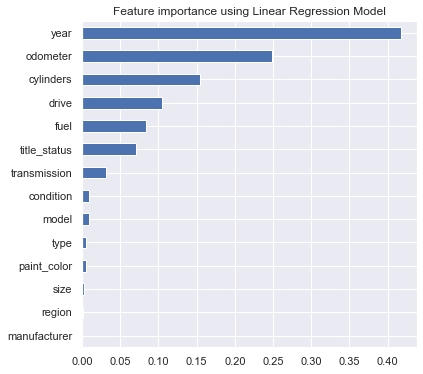

In [148]:
#Ploting feature importance graph

coef = pd.Series(abs(LR.coef_), index = X_train.columns)
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Linear Regression Model")
plt.savefig('Linear-Regression-Feature-Importance.jpg')
plt.show()

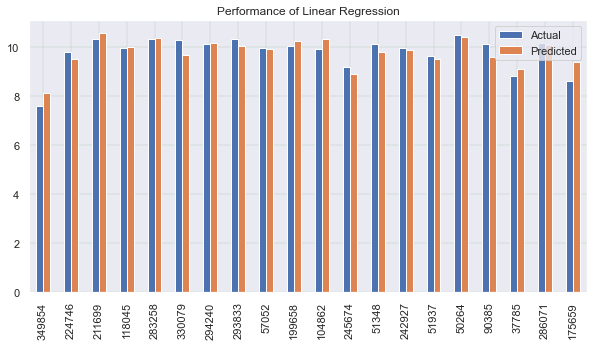

In [140]:
#Visualization of true value and predicted

df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr})
df_check = df_check.sample(20)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='Green')
plt.title('Performance of Linear Regression')
# plt.savefig('Linear-Regression-Performance')
plt.show()

### Ridge CV Regressor

In [135]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error

# Define a range of alpha values to try
alphas = [0.01, 0.1, 1.0, 10.0, 100]  # Add more alpha values if needed

# Create a RidgeCV regression model with cross-validation
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)

# Fit the model to the training data
ridge_cv.fit(X_train, y_train)

# Find the best alpha value chosen by cross-validation
best_alpha = ridge_cv.alpha_
print("Best alpha:", best_alpha)

Best alpha: 10.0


In [136]:
y_pred_ridge = ridge_cv.predict(X_test)

In [137]:
print('Coefficients: \n', ridge_cv.coef_)
msle = mean_squared_log_error(y_test, y_pred_ridge)
r2 = r2_score(y_test, y_pred_ridge)
mse = mean_squared_error(y_test, y_pred_ridge)

print("Mean Squared Logarithmic Error (MSLE):", msle)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Coefficients: 
 [-0.00093493  0.41713665 -0.00052705 -0.00903816 -0.00943067  0.15402968
 -0.08412426 -0.24899454 -0.07134715  0.03093785 -0.10409059 -0.00318468
  0.00582499  0.00577597]
Mean Squared Logarithmic Error (MSLE): 0.0023792015503190725
Mean Squared Error (MSE): 0.25030264441782274
R-squared (R2) Score: 0.6293519559694547


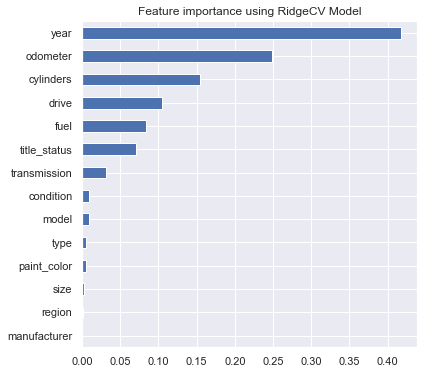

In [149]:
#Ploting feature importance graph

coef = pd.Series(abs(ridge_cv.coef_), index = X_train.columns)
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using RidgeCV Model")
# plt.savefig('RidgeCV-Feature-Importance.jpg')
plt.show()

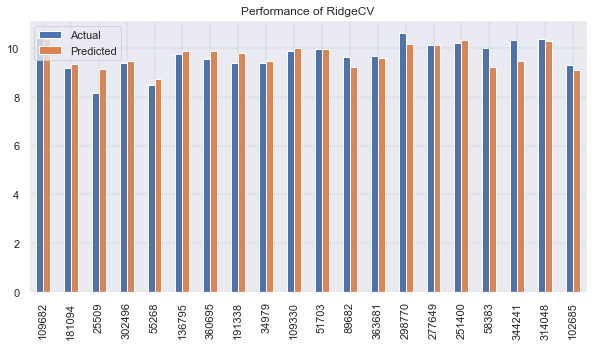

In [141]:
#Visualization of true value and predicted

df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_ridge})
df_check = df_check.sample(20)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='Green')
plt.title('Performance of RidgeCV')
# plt.savefig('Linear-Regression-Performance')
plt.show()

### Random Forest Regressor

In [142]:
RFR = RandomForestRegressor(n_estimators=100,random_state=0, min_samples_leaf=1, max_features=0.5, n_jobs=-1, oob_score=True)
RFR.fit(X_train,y_train)
y_pred_rf = RFR.predict(X_test)

In [144]:
print('Coefficients: \n', RFR.feature_importances_)
msle = mean_squared_log_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)

print("Mean Squared Logarithmic Error (MSLE):", msle)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Coefficients: 
 [0.02289753 0.40470176 0.03879314 0.06394159 0.01630752 0.0730801
 0.06048043 0.18772032 0.00726323 0.02438542 0.05492031 0.00716197
 0.02503173 0.01331494]
Mean Squared Logarithmic Error (MSLE): 0.0006006749775615494
Mean Squared Error (MSE): 0.05911693487904448
R-squared (R2) Score: 0.9124596692417575


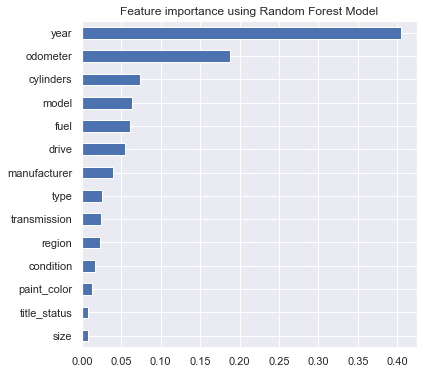

In [145]:
#Ploting feature importance graph

coef = pd.Series(RFR.feature_importances_, index = X_train.columns)
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Random Forest Model")
# plt.savefig('Random-Forest-Importance.jpg')
plt.show()

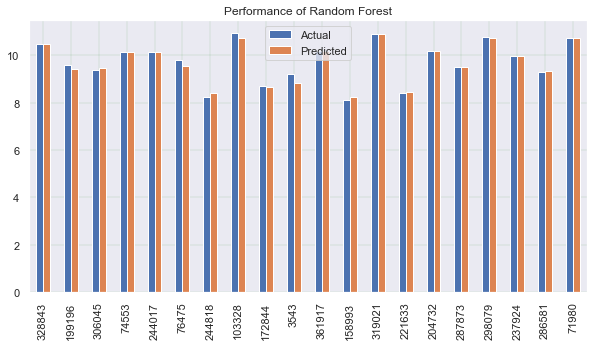

In [150]:
#Visualization of true value and predicted

df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
df_check = df_check.sample(20)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='Green')
plt.title('Performance of Random Forest')
# plt.savefig('Random-Forest-Performance')
plt.show()

## Evaluation

Model evaluation is an iterative process, and it may require fine-tuning and re-evaluation to achieve the best results.

Based on the results above, we can see the `Random Forest` outperforming the other regression models.
We are considering the evaluation parameters `MLSE` over `MSE` as our target variable is `logarithmic`. Also in the case of Random Forest, the `High R2` value indicates that the model has fitted the data significantly well explaining most of the variance.


## Deployment

Based on the feature importance plots above, it’s very obvious that the Age of the car is the most important aspect determining the price of a Car. Having experimented a few ML techniques, the Random Forest Regressor was the best among other regression models.The R2 score was computed for each of the models. We could also train on a larger data with less missing values to give a better accuracy.

Further model refinement and hyperparameter tuning could potentially improve predictive performance.

To understand what factors make a car more or less expensive in the used car market and provide recommendations to a used car dealership on what consumers value, we need to consider several key factors that influence a car's price. These factors include vehicle-specific factors, market factors, and consumer preferences.